# Experience of faculties

Slope: 1.1330275229357798
Intercept: 69.6697247706422


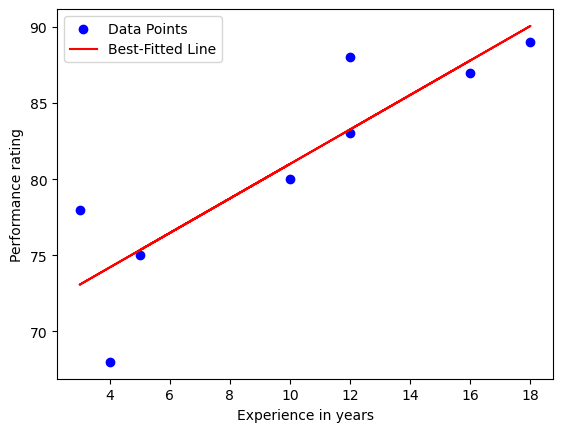

Estimated performance rating for a faculty with 20 years of experience: 92.3302752293578


In [52]:
import matplotlib.pyplot as plt
import numpy as np

experience = [16, 12, 18, 4, 3, 10, 5, 12]
performance_rating = [87, 88, 89, 68, 78, 80, 75, 83]

experience_mean = np.mean(experience)
performance_mean = np.mean(performance_rating)

numerator = np.sum((experience - experience_mean) * (performance_rating - performance_mean))
denominator = np.sum((experience - experience_mean) ** 2)

slope = numerator / denominator
intercept = performance_mean - slope * experience_mean

print("Slope:", slope)
print("Intercept:", intercept)

x = np.array(experience)
y = slope * x + intercept

plt.scatter(experience, performance_rating, color='b', label='Data Points')
plt.plot(x, y, color='r', label='Best-Fitted Line')
plt.xlabel('Experience in years')
plt.ylabel('Performance rating')
plt.legend()
plt.show()

new_experience = 20
estimated_rating = slope * new_experience + intercept
print("Estimated performance rating for a faculty with 20 years of experience:", estimated_rating)


# Boston Dataset

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Boston.csv")
print(df.shape)

(506, 14)


In [7]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


In [9]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [10]:
Y_pred = model.predict(X_test)
print(Y_pred)


[32.3914647  27.94401279 17.83762764 21.66941388 18.93639614 20.01995795
 32.63414961 17.86179976 24.73211676 26.77346826 27.26138023 28.63243014
 21.16103038 27.15098589 23.33198614 21.02894005 17.11819755 37.52455938
 30.69864427  8.46104486 20.83966032 16.26732451 25.05030307 24.8069032
 31.6789299  10.98989363 13.54111562 16.54697099 35.86699683 14.69589266
 21.05655107 13.90301353 43.01321262 17.80335305 21.68817023 20.45077825
 17.38095983 26.81334904 10.08706217 19.96174586 24.1983249  21.00202622
 29.38682967 16.33215467 19.37439646 14.45525235 39.52670798 18.18535021
 26.38536303 20.41420863 25.08511581 24.40208165 24.87902769 26.97887956
  4.93921657 24.0001365  10.66711602 26.98494775 16.63507993 35.31652989
 19.49249915 27.37577863 16.53965715 19.09746715 11.06765336 32.03445261
 36.15847648 21.53547868 24.96434626 25.50601154 23.41203509  7.20513615
 16.8659937  20.06269471 20.61979368 21.97238475 34.25908683 27.9998298
 24.95261644 34.74201458 18.63786454 23.95355085 34.5

In [13]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2_score(Y_test, Y_pred))

Mean Absolute Error:  3.344665503598752
Mean Squared Error:  19.831323672063103
Root Mean Squared Error:  4.453237437198145
R2 Score:  0.7836295385076295


In [17]:
splits = [(0.6, 0.4), (0.5, 0.5), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1), (0.95, 0.05)]
random_seeds = [42, 55, 77, 99]

for train_size, test_size in splits:
    for seed in random_seeds:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = mean_squared_error(Y_test, Y_pred, squared=False)
        mae = mean_absolute_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)

        print(f"Train-Test Split: {train_size}-{test_size}, Random Seed: {seed}")
        print("Mean Squared Error (MSE):", mse)
        print("Root Mean Squared Error (RMSE):", rmse)
        print("Mean Absolute Error (MAE):", mae)
        print("R2 Score:", r2)
        print("************************************")

Train-Test Split: 0.6-0.4, Random Seed: 42
Mean Squared Error (MSE): 21.832709989577527
Root Mean Squared Error (RMSE): 4.6725485540096345
Mean Absolute Error (MAE): 3.297969683492429
R2 Score: 0.7125140936111212
************************************
Train-Test Split: 0.6-0.4, Random Seed: 55
Mean Squared Error (MSE): 22.463618438226447
Root Mean Squared Error (RMSE): 4.739579985423439
Mean Absolute Error (MAE): 3.3869314351933566
R2 Score: 0.736244253824488
************************************
Train-Test Split: 0.6-0.4, Random Seed: 77
Mean Squared Error (MSE): 20.68310866479998
Root Mean Squared Error (RMSE): 4.547868584820804
Mean Absolute Error (MAE): 3.4636606401623937
R2 Score: 0.6928948118878467
************************************
Train-Test Split: 0.6-0.4, Random Seed: 99
Mean Squared Error (MSE): 27.234490650049214
Root Mean Squared Error (RMSE): 5.218667516718153
Mean Absolute Error (MAE): 3.705639447402496
R2 Score: 0.6788552334055927
************************************
Tra

# Housing Pricing 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dfH = pd.read_csv("House Prices AI Lab.csv")
dfH.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


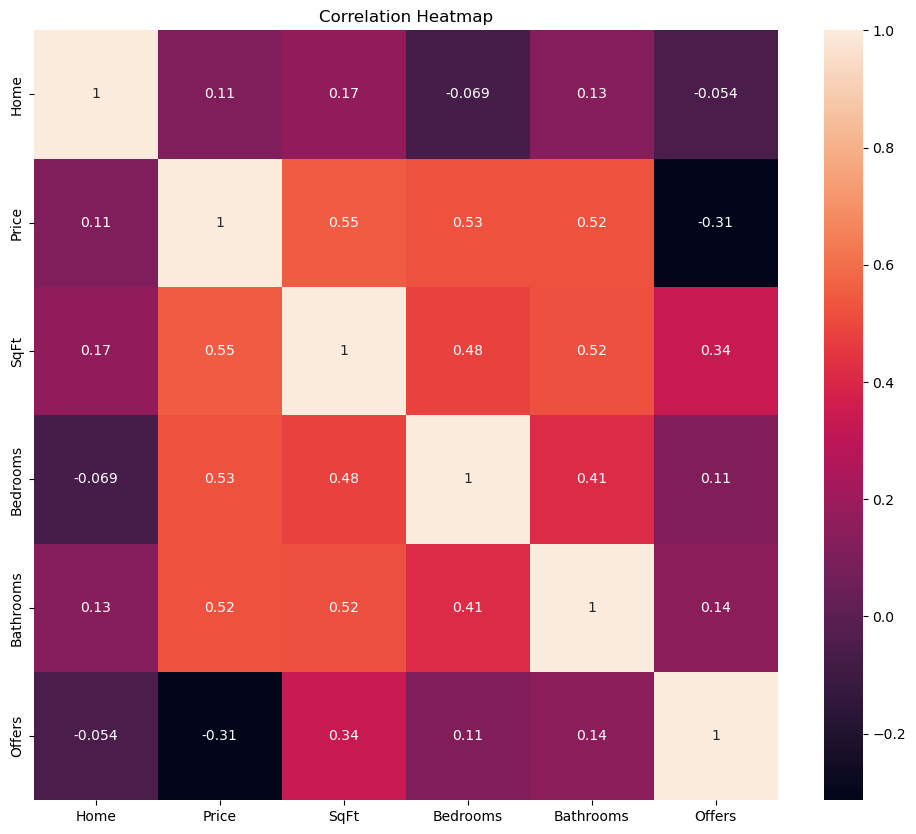

In [28]:
correlation = dfH.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

In [45]:

label_encoder = LabelEncoder()
dfH['BRICS_label_encoded'] = label_encoder.fit_transform(dfH['Brick'])
dfH['Neighborhood_label_encoded'] = label_encoder.fit_transform(dfH['Neighborhood'])
X = dfH[['SqFt', 'Bedrooms', 'Bathrooms','Offers', 'BRICS_label_encoded', 'Neighborhood_label_encoded']]
y = dfH['Price']


model = LinearRegression()
model.fit(X, y)

slope_coefficients = model.coef_

for i, feature in enumerate(X.columns):
    print(f"Slope coefficient for {feature}: {slope_coefficients[i]}")


Slope coefficient for SqFt: 58.82937111643141
Slope coefficient for Bedrooms: 6381.810937870845
Slope coefficient for Bathrooms: 8689.53761144661
Slope coefficient for Offers: -10433.767078602137
Slope coefficient for BRICS_label_encoded: 18533.259299108915
Slope coefficient for Neighborhood_label_encoded: 9519.917029650098


In [49]:
y_pred = model.predict(X)
residuals = y - y_pred
print("Residuals:")
print(residuals)

Residuals:
0      15805.796103
1       -743.107762
2       2431.686643
3     -10919.828268
4      -3333.771547
           ...     
123    -8436.275489
124    -1913.722917
125   -10986.344839
126    -6669.908941
127    -4679.446032
Name: Price, Length: 128, dtype: float64
